<a href="https://colab.research.google.com/github/JoyJoyWang/NLP/blob/main/aml_hw2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from google.colab import drive
drive.mount('/content/drive')

import os

# Specify the desired directory path
new_directory = '/content/drive/MyDrive/AML HW2'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

# Verify the current working directory
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AML HW2


# Load the Dateset

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/AML HW2/data/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/AML HW2/data/test.csv")

## A Quick Look at the Dataset

In [ ]:
print(train_df.head())
print(test_df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# number of data points
print(train_df.shape)
print(test_df.shape)

(7613, 5)
(3263, 4)


# Exploratory Data Analysis (EDA) on the Training Set

## Missing Values

In [ ]:
# Checking for missing values
missing_values = train_df[['keyword', 'location', 'text']].isnull().sum()

missing_values

keyword       61
location    2533
text           0
dtype: int64

## Percentage of Real Disasters

In [ ]:
total_num = train_df.shape[0]
count_true = train_df[train_df['target'] == 1]['target'].count()
percent_true = round(count_true / total_num, 2)
percent_false = round(1 - percent_true, 2)

print("Percentage of real disasters is: " + str(percent_true))
print("Percentage of false disasters is: " + str(percent_false))

Percentage of real disasters is: 0.43
Percentage of false disasters is: 0.57


## Sample for Both Disaster and Non-disaster Classes

In [ ]:
sample_disaster_tweets = train_df[train_df['target'] == 1]['text'].sample(5).tolist()
sample_non_disaster_tweets = train_df[train_df['target'] == 0]['text'].sample(5).tolist()

sample_disaster_tweets, sample_non_disaster_tweets

(['Learning from the Legacy of a Catastrophic Eruption http://t.co/RbmuCURS2F',
  'Wow what beauty lies within every storm. Taken today after a rainstorm at A&amp;B Pipeliners http://t.co/pSt5bBQ0av',
  'Watch how bad that fool get burned in coverage this year. Dat dude is all-pro practice squad material',
  '@ameenshaikh3 sir i just only wanted to make a point about @sureshpprabhu you made and said he is lying about bridge collapse.',
  "@antpips67 @JohnEJefferson obviously I'm aware that not all AS are from countries we have bombed but a lot are fleeing conflict"],
 ["53 years ago this week is the anniversary of Marilyn Monroe's death RIPRIPRIP",
  'Tips so that finding the customers ego drought: dqSVYusY',
  'Mary coming to Troy rescue. ?????? https://t.co/rosVXQeLQj',
  'According to a 2011 Gallup poll the more money you have the more likely you are to suffer from time famine.? Ari\x89Û_ http://t.co/QdmVTJ4lZJ',
  'In 2014 I will only smoke crqck if I becyme a mayor. This includes 

## Explore the 'text' Feature

In [ ]:
# Calculate and print statistics for the train_df
print("Train Text Length Stat")
print(train_df["text"].apply(len).describe())
print()

# Calculate and print statistics for the test_df
print("Test Text Length Stat")
print(test_df["text"].apply(len).describe())

Train Text Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text, dtype: float64

Test Text Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: text, dtype: float64


# Preprocess the Data

**Desicon Making:**

1. **Convert all the words to lowercase:**
   - **Decision:** Yes.
   - **Reason:** Case normalization helps in treating the same word in different cases as one, ensuring consistency. For example, "Tweet" and "tweet" will be treated as the same word. This reduces the feature space and aids in generalization.

2. **Lemmatize all the words:**
   - **Decision:** Yes.
   - **Reason:** Lemmatization converts words to their base or root form, which can be beneficial in understanding the underlying meaning and reducing the feature space. Lemmatization ensures that the root word is meaningful.

3. **Strip punctuation:**
   - **Decision:** Yes.
   - **Reason:** Punctuation often doesn't add significant meaning to the text, especially for this type of classification task. Removing punctuation can help reduce the noise in the data.

4. **Strip the stop words:**
   - **Decision:** Yes.
   - **Reason:** Stop words like "the", "and", "or" are frequent in the English language but often don't carry significant meaning on their own.

5. **Strip @ and URLs:**
   - **Decision:** Yes.
   - **Reason:** Mentions (like "@username") and URLs often don't provide useful information for our classification task. Moreover, mentions can be seen as noise since the username might not have any relation to the content of the tweet regarding a disaster. Stripping these elements will clean up our text significantly.

6. **Something else**
   - **Decision:** Remove numbers and special characters, and strip extra white spaces.
   - **Reason:** Numbers and special characters might not add much context in determining whether a tweet is about a disaster or not. Stripping extra white spaces helps in maintaining a clean text format.



In [ ]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    # Remove @ mentions and URLs
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Strip extra white spaces
    text = text.strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Lemmatize and remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to text
    text = ' '.join(tokens)

    return text


In [ ]:
# Apply preprocessing to the 'text' column -- both train and test
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
train_df.head()

test_df['processed_text'] = test_df['text'].apply(preprocess_text)
test_df.head()

,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (70%) and dev (30%) sets
training_df, dev_df = train_test_split(train_df, test_size=0.3, random_state=42)

# Print the shapes of the resulting DataFrames to verify the split
print("Training DataFrame shape:", training_df.shape)
print("Dev DataFrame shape:", dev_df.shape)

Training DataFrame shape: (5329, 6)
Dev DataFrame shape: (2284, 6)


In [ ]:
training_df.to_csv('training_df.csv', index=False)
dev_df.to_csv('dev_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

# Feature Engineering(Bags of words model)

## Decision of Threshold M

Given the context:

- M represents the threshold for the number of words in the vocabulary.
- k represents the minimum number of different tweets a word should appear in to be considered for inclusion in the vocabulary.

When implementing:

- First filter out words that appear in fewer than k tweets.
- From this filtered list, then select the top M most frequent words to form the vocabulary.

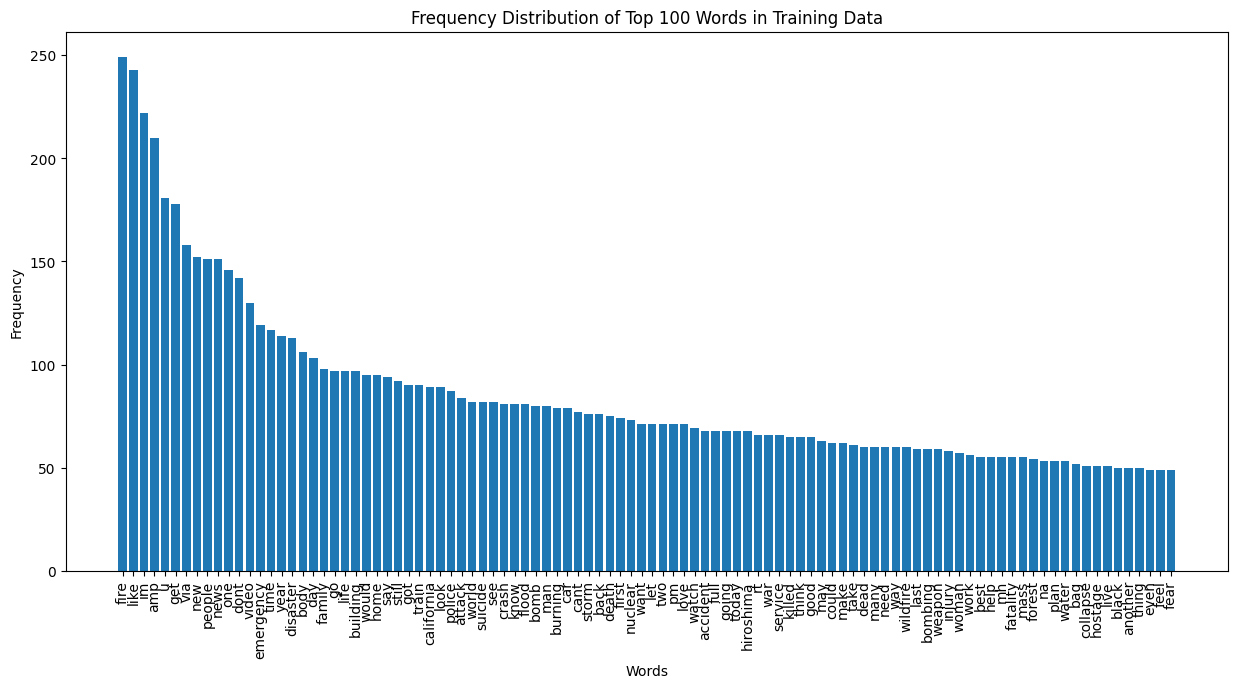

In [ ]:
# visualze the freq distribution of words in the training data

from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the processed_text and compute the frequency distribution
all_words = ' '.join(training_df['processed_text']).split()
word_freq = Counter(all_words) # dict, key: word, value:count/freq

# Sort words by frequency
word_freq_list = word_freq.items()
sorted_word_freq = sorted(word_freq_list, key=lambda x: x[1], reverse=True) #

# Extract word frequencies for visualization
words, frequencies = zip(*sorted_word_freq) # tuple unpacking

# Plot the frequency distribution of the top N words
N = 100
plt.figure(figsize=(15, 7))
plt.bar(words[:N], frequencies[:N])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution of Top {N} Words in Training Data')
plt.show()

A few observations:
- There's a steep drop in frequency after the first few words.
- Words like "fire", "new", "via", and "disaster" are among the most frequent.

### Deciding on k

 k represents the minimum number of different tweets a word should appear in to be considered for inclusion in the vocabulary. It serves as a filter to exclude words that might appear frequently but only in a limited number of tweets.

 We can compute the distribution of words based on the number of tweets they appear in to help decide on a suitable value for k


In [ ]:
# Compute the distribution of words based on the number of tweets they appear in
tweet_word_sets = [set(tweet.split()) for tweet in training_df['processed_text']]
word_tweet_counts = Counter(word for word_set in tweet_word_sets for word in word_set)

# Compute the distribution of word counts (how many words appear in 1 tweet, 2 tweets, etc.)
word_cnt_distribution = Counter(word_tweet_counts.values()) # dict

# Display the distribution
print(word_cnt_distribution.most_common(10)) # (num of tweets, num of words)

[(1, 6377), (2, 1433), (3, 678), (4, 415), (5, 275), (6, 192), (7, 140), (8, 132), (9, 107), (10, 89)]


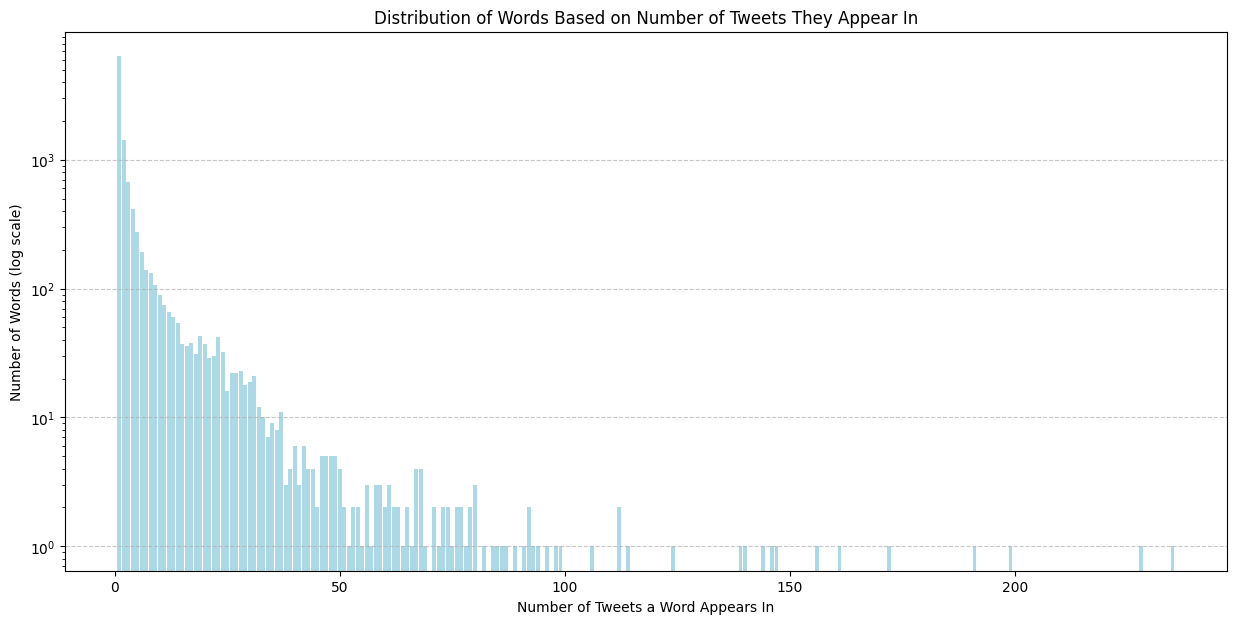

In [ ]:
# Plotting the distribution of word counts
x_values = list(word_cnt_distribution.keys()) # Number of Tweets a Word Appears In
y_values = list(word_cnt_distribution.values()) # Number of Words (log scale)

plt.figure(figsize=(15, 7))
plt.bar(x_values, y_values, color='lightblue')
plt.yscale('log')  # Using a logarithmic scale for better visualization
plt.xlabel('Number of Tweets a Word Appears In')
plt.ylabel('Number of Words (log scale)')
plt.title('Distribution of Words Based on Number of Tweets They Appear In')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on this, we can now get the number of qualified words given k(words that appear in at least 'k' different tweets).

In [ ]:
# Calculate the number of words that appear in at least 'k' different tweets for k in range(1, 11)
word_counts = {}

for k in range(1, 11):
    word_counts[k] = sum(count for key, count in word_cnt_distribution.items() if key >= k)

word_counts

{1: 10791,
 2: 4414,
 3: 2981,
 4: 2303,
 5: 1888,
 6: 1613,
 7: 1421,
 8: 1281,
 9: 1149,
 10: 1042}

Given the distribution and analysis above, setting k = 2 or 3 may be a good starting point. This ensures words in the vocabulary appears in at least a few times as well as reducing noise.

### Deciding on M based on k


To decide on M (the size of the vocabulary), we need to consider how many words we want to capture in our vocabulary. We can further explore the cumulative distribution of word frequencies to understand how many words we might capture by setting different frequency thresholds based on k. The steps:

1. **Filter Out Words Based on k**:
   - Keep only words that appear in at least k different tweets.
   
2. **Compute Cumulative Distribution for Filtered Words**:
   - For the words remaining after the k filter, compute the cumulative distribution of their occurrences. This will help determine how many of the most frequent words are needed to cover a certain percentage of total word occurrences.
   
3. **Determine M Based on Desired Coverage Percentage**:
   - Decide on a target coverage percentage (e.g., 80%, 85%, or 90%). This refers to the portion of the entire dataset's word occurrences that we aim to cover using the most frequent words.
   - Determine the M value corresponding to this percentage from the cumulative distribution. This M value will indicate the size of the vocabulary needed to achieve the desired coverage percentage.

In [ ]:
# Calculate the total word occurrences in the dataset
total_occurrences = sum(word_freq.values())

# pre: filter out words based on k, compute the cumulative distribution
def compute_cumulative_distribution(k, word_freq, total_occurrences):
    """
    Computes the cumulative distribution after filtering words based on 'k'.

    Parameters:
    - k: The minimum number of tweets a word should appear in.
    - word_freq: A dictionary with words as keys and their frequencies as values.
    - total_occurrences: Total word occurrences in the dataset.

    Returns:
    - A list of tuples containing words and their cumulative distribution percentages.
    """
    # Filter words based on 'k'
    filtered_words = {word: freq for word, freq in word_freq.items() if word_tweet_counts[word] >= k}
    sorted_filtered_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

    # Compute the cumulative distribution
    cumulative_distribution = []
    cumulative_sum = 0
    for word, freq in sorted_filtered_words:
        cumulative_sum += freq
        # calculate the cumulative distribution as a percentage of the total word occurrences
        percentage = (cumulative_sum / total_occurrences) * 100
        cumulative_distribution.append((word, percentage))

    return cumulative_distribution

# pre: find M based on coverage_percentage
def find_M_for_coverage(coverage_percentage, cumulative_distribution):
    """
    Finds the M value for a given desired coverage percentage.

    Parameters:
    - coverage_percentage: The desired percentage of total word occurrences to cover.
    - cumulative_distribution: A list of tuples containing words and their cumulative distribution percentages.

    Returns:
    - The M value that corresponds to the desired coverage percentage.
    """
    for word, percentage in cumulative_distribution:
        if percentage >= coverage_percentage:
            return cumulative_distribution.index((word, percentage)) + 1

# This is the main function
def determine_M_for_k(k, desired_coverages=[80, 85, 90]):
    """
    Determines the M values for a given k based on desired coverage percentages.

    Parameters:
    - k: The minimum number of tweets a word should appear in.
    - desired_coverages: List of desired coverage percentages.

    Returns:
    - A dictionary with desired coverage percentages as keys and corresponding M values as values.
    """
    cumulative_distribution = compute_cumulative_distribution(k, word_freq, total_occurrences)
    M_values = {coverage: find_M_for_coverage(coverage, cumulative_distribution) for coverage in desired_coverages}
    return M_values



In [ ]:
# Determine M values as an example
print(determine_M_for_k(2))
print(determine_M_for_k(3))

# None: after filtering words based on k, the cumulative_distribution of word occurrences does not reach 90%

{80: 2988, 85: 4141, 90: None}
{80: None, 85: None, 90: None}


Given the analysis above, setting k = 2 and M = 4000 may be a threshold choice, since it balances coverage and vocabukary size. For k = 2, the cumulative distribution showed that around 4141 words account for 85% of the total word occurrences. By setting M slightly below this (at 4000), we're capturing a large portion of the word occurrences while keeping the vocabulary size manageable.


## Process train data

In [ ]:
filtered_words = {word: freq for word, freq in word_freq.items() if word_tweet_counts[word] >= 2}

sorted_filtered_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

top_4000_words = sorted_filtered_words[:4000]
vocabulary = [word for word, _ in sorted_filtered_words]


In [ ]:
train_data = training_df['processed_text'].tolist()
train_target = training_df['target'].tolist()
dev_data = dev_df['processed_text'].tolist()
dev_target = dev_df['target'].tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer(binary=True, min_df=2, token_pattern=r'\b\w+\b')

X_train = count_vect.fit_transform(train_data).toarray()

X_dev = count_vect.transform(dev_data).toarray()

# vector for train data
print(X_train.shape)
print(X_dev.shape)
X_train

(5329, 4414)
(2284, 4414)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
feature_names = count_vect.get_feature_names_out()

print("Feature Names:")
print(feature_names[:10])

Feature Names:
['aa' 'ab' 'aba' 'abandon' 'abandoned' 'abbott' 'abbswinston' 'abc'
 'abcnews' 'ability']


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Softmax and fit the data.
logreg = LogisticRegression(C=1e5, multi_class='multinomial', verbose=True)
logreg.fit(X_train, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0, multi_class='multinomial', verbose=True)

A simple test

In [ ]:
docs_new = ['God is love', 'fire is here, urgent']

X_new = count_vect.transform(docs_new)
predicted = logreg.predict(X_new)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc,category))

'God is love' => 0
'fire is here, urgent' => 1


## Process development sets

In [ ]:
predicted = logreg.predict(X_dev)

#for doc, category in zip(X_dev, predicted):
    #print('%r => %s' % (doc,category))

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


logreg_no_reg = LogisticRegression(penalty='none')


logreg_no_reg.fit(X_train, train_target)


y_train_pred = logreg_no_reg.predict(X_train)
f1_train = f1_score(train_target, y_train_pred)


y_dev_pred = logreg_no_reg.predict(X_dev)
f1_dev = f1_score(dev_target, y_dev_pred)


print("F1 Score on Training Set (No Regularization):", f1_train)
print("F1 Score on Development Set (No Regularization):", f1_dev)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


F1 Score on Training Set (No Regularization): 0.9810168012219069
F1 Score on Development Set (No Regularization): 0.6817067189798921


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

logreg_L1 = LogisticRegression(penalty='l1', solver='liblinear')


logreg_L1.fit(X_train, train_target)


y_train_pred_L1 = logreg_L1.predict(X_train)
f1_train_L1 = f1_score(train_target, y_train_pred_L1)


y_dev_pred_L1 = logreg_L1.predict(X_dev)
f1_dev_L1 = f1_score(dev_target, y_dev_pred_L1)


print("F1 Score on Training Set (L1):", f1_train_L1)
print("F1 Score on Development Set (L1):", f1_dev_L1)

F1 Score on Training Set (L1): 0.8532658693652254
F1 Score on Development Set (L1): 0.7431991294885746


In [ ]:

logreg_L2 = LogisticRegression(penalty='l2')


logreg_L2.fit(X_train, train_target)


y_train_pred_L2 = logreg_L2.predict(X_train)
f1_train_L2 = f1_score(train_target, y_train_pred_L2)


y_dev_pred_L2 = logreg_L2.predict(X_dev)
f1_dev_L2 = f1_score(dev_target, y_dev_pred_L2)


print("F1 Score on Training Set (L2):", f1_train_L2)
print("F1 Score on Development Set (L2):", f1_dev_L2)

F1 Score on Training Set (L2): 0.9078498293515358
F1 Score on Development Set (L2): 0.757825370675453


In [ ]:
coefficients = logreg_L1.coef_

# Display the coefficients for each feature
#print("Coefficients for each word:")
#for word,coef in zip(feature_names,coefficients[0][:40]):
#    print(word,coef)

print("Top 10 words with the largest coefficients:")
coef_word_pairs = [(word, coef) for word, coef in zip(feature_names, coefficients[0])]
sorted_coef_word_pairs = sorted(coef_word_pairs, key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 words
for word, coef in sorted_coef_word_pairs[:10]:
    print(f"{word}: {coef}")

Top 10 words with the largest coefficients:
hiroshima: 3.4886450574487937
airport: 3.486486901731712
spill: 3.4476750530086173
derailment: 3.194458383372672
typhoon: 3.176672858446369
migrant: 3.087532551193806
wildfire: 3.0830036082750594
earthquake: 2.896327736738415
debris: 2.7478358516103936
outbreak: 2.672882294026606


# Bernoulli Naive Bayes

In [ ]:
n = X_train.shape[0] # size of the dataset
d = X_train.shape[1] # number of features in our dataset
K = 2
alpha = 1
# these are the shapes of the parameters
psis = np.zeros([K,d])
phis = np.zeros([K])
y_train=np.array(train_target)
# we now compute the parameters
for k in range(K):
    X_k = X_train[y_train == k]
    nk=X_k.shape[0]
    njk=X_k.sum(axis=0)
    psis[k] = (njk+alpha)/(nk+2*alpha)
    phis[k] = X_k.shape[0] / float(n)

# print out the class proportions
print(phis)


[0.56746106 0.43253894]


In [ ]:
# we can implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.

    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))

    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)

    # compute log-probabilities
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

idx, logpyx = nb_predictions(X_train, psis, phis)
print(idx[:10])

[1 1 1 0 0 1 1 0 0 1]


In [ ]:
print((idx==y_train).mean())
f1 = f1_score(y_train, idx, average='weighted')
print("F1 Score:", f1)

0.8669544004503659
F1 Score: 0.8649624852249282


In [ ]:
y_dev=np.array(dev_target)


In [ ]:
idx_dev, logpyx_dev = nb_predictions(X_dev, psis, phis)
print(idx_dev[:10])
print((idx_dev==y_dev).mean())
f1 = f1_score(y_dev, idx_dev, average='weighted')

print("F1 Score:", f1)

[0 0 1 0 0 0 0 0 0 0]
0.8104203152364273
F1 Score: 0.8070448701518863


# Model comparison

Bernoulli Naive Bayes Model performed the best in predicting whether a tweet is of a real disaster with accuracy on development dataset of 0.81 and a F1 score at 0.81.

Text data usually consists of discrete words or features, each of which either appears or does not appear. The Bernoulli Naive Bayes model is naturally suitable for processing binary or binary features, and is not prone to overfitting. However, Naive Bayes assumes that words are uncorrelated, but in reality they are. As a result, the probabilities estimated by Naive Bayes can be over- or under-confident. Discriminative models are sensitive to noise and missing data in the input data, which can lead to performance degradation.

# N-gram model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


ngram_vectorizer = CountVectorizer(ngram_range=(1, 2),min_df=3)


ngram_vectorizer.fit(training_df['processed_text'])


ngram_features = ngram_vectorizer.get_feature_names_out()

print("N-gram词表:")
print(ngram_features[:10])
len(ngram_features)

N-gram词表:
['aa' 'aba' 'aba woman' 'abandoned' 'abandoned aircraft' 'abbswinston'
 'abbswinston zionist' 'abc' 'abc news' 'ability']


4456

In [ ]:
X_train_ngram = ngram_vectorizer.fit_transform(train_data).toarray()
X_dev_ngram = ngram_vectorizer.transform(dev_data).toarray()

# vector for train data
print(X_train_ngram.shape)
print(X_dev_ngram.shape)

#count=0
#covered_data_count = X_train_ngram.getnnz(axis=1)
#for i in covered_data_count:
#  if i !=0:
#    count+=1

#count

(5329, 4456)
(2284, 4456)


I think M=3 is good choice as when M=[1,2,3,4,5,6,7,8], the corresponding coverage of data is [100%,99.8%,99.8%,99.7%,99.7%,99.6%,99.5%,99.5%] and the corresponding number of vocabulary is [42414,7786,4456,3218,2521,2079,1790,1585]. When M changes from 2 to 3, the number of words in the bag of words is greatly reduced and it still covers most of the data. When M continues to increase, the number of words in the bag of words begins to decrease slowly.

## Logistic regression on N-gram data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


logreg_no_reg_ngram = LogisticRegression(penalty='l1', solver='liblinear')


logreg_no_reg_ngram.fit(X_train_ngram, train_target)


y_train_pred_ngram = logreg_no_reg_ngram.predict(X_train_ngram)
f1_train_ngram = f1_score(train_target, y_train_pred_ngram)


y_dev_pred_ngram = logreg_no_reg_ngram.predict(X_dev_ngram)
f1_dev_ngram = f1_score(dev_target, y_dev_pred_ngram)


print("F1 Score on Training Set (L1):", f1_train_ngram)
print("F1 Score on Development Set (L1):", f1_dev_ngram)

F1 Score on Training Set (L1): 0.853890824622532
F1 Score on Development Set (L1): 0.7428571428571428


## BNB

In [ ]:
n = X_train_ngram.shape[0] # size of the dataset
d = X_train_ngram.shape[1] # number of features in our dataset
K = 2
alpha = 1
# these are the shapes of the parameters
psis_ngram = np.zeros([K,d])
phis_ngram = np.zeros([K])
y_train=np.array(train_target)
# we now compute the parameters
for k in range(K):
    X_k_ngram = X_train_ngram[y_train == k]
    nk_ngram=X_k_ngram.shape[0]
    njk_ngram=X_k_ngram.sum(axis=0)
    psis_ngram[k] = (njk_ngram+alpha)/(nk_ngram+2*alpha)
    phis_ngram[k] = X_k_ngram.shape[0] / float(n)

# print out the class proportions
print(phis_ngram)


[0.56746106 0.43253894]


In [ ]:
# we can implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.

    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))

    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)

    # compute log-probabilities
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

idx_ngram, logpyx_ngram = nb_predictions(X_train_ngram, psis_ngram, phis_ngram)
print(idx_ngram[:10])

[1 0 1 0 0 1 0 0 0 1]


In [ ]:
print((idx_ngram==y_train).mean())
f1_ngram = f1_score(y_train, idx_ngram, average='weighted')
print("F1 Score:", f1_ngram)

0.8380559204353537
F1 Score: 0.8326100017602264


In [ ]:

y_dev_ngram=np.array(dev_target)


In [ ]:
idx_dev_ngram, logpyx_dev_ngram = nb_predictions(X_dev_ngram, psis_ngram, phis_ngram)
print(idx_dev_ngram[:10])
print((idx_dev_ngram==y_dev).mean())
f1_dev_ngram = f1_score(y_dev_ngram, idx_dev_ngram, average='weighted')
print("F1 Score:", f1_dev_ngram)

[0 0 0 0 0 0 0 0 0 1]
0.8025394045534151
F1 Score: 0.7936718923886651


# Determine performance with the test set

In [ ]:
train_data = training_df['processed_text'].tolist()
train_target = training_df['target'].tolist()
dev_data = dev_df['processed_text'].tolist()
dev_target = dev_df['target'].tolist()
# union
train_data_final = train_data + dev_data
train_target_final = train_target + dev_target

#test dataset
test_data=test_df['processed_text'].tolist()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer(binary=True, min_df=2, token_pattern=r'\b\w+\b')

X_train_final = count_vect.fit_transform(train_data_final).toarray()

X_test = count_vect.transform(test_data).toarray()

# vector for train data
print(X_train_final.shape)
print(X_test.shape)
X_train

(7613, 5575)
(3263, 5575)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
n = X_train_final.shape[0] # size of the dataset
d = X_train_final.shape[1] # number of features in our dataset
K = 2
alpha = 1
# these are the shapes of the parameters
psis_final = np.zeros([K,d])
phis_final = np.zeros([K])
y_train_final=np.array(train_target_final)
# we now compute the parameters
for k in range(K):
    X_k_final = X_train_final[y_train_final == k]
    nk_final=X_k_final.shape[0]
    njk_final=X_k_final.sum(axis=0)
    psis_final[k] = (njk_final+alpha)/(nk_final+2*alpha)
    phis_final[k] = X_k_final.shape[0] / float(n)

# print out the class proportions
print(phis_final)


[0.57034021 0.42965979]


In [ ]:
# we can implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.

    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))

    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)

    # compute log-probabilities
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

idx_final, logpyx_final = nb_predictions(X_train_final, psis_final, phis_final)
print(idx_final[:10])

[1 0 1 0 0 1 1 0 0 1]


In [ ]:
print((idx_final==y_train_final).mean())
f1_final = f1_score(y_train_final, idx_final, average='weighted')
print("F1 Score:", f1_final)

0.8641796926310259
F1 Score: 0.8620992069521449


In [ ]:


idx_test, logpyx_test = nb_predictions(X_test, psis_final, phis_final)
print(idx_test[:10])


[1 1 1 1 1 1 0 0 0 0]


In [ ]:
prediction_df = pd.DataFrame({
    "id": test_df["id"],
    "target": idx_test
})


prediction_df.to_csv("prediction.csv", index=False)

from google.colab import files
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>